# Notebook pour la construction d'histogrammes 
### Mesure de masses d'un volume d'eau prélevé à l'aide de différentes pièces de verrerie : 
 - bécher de 150 mL
 - éprouvette graduée de 50 mL
 - fiole jaugée à 50 mL
 


In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib

# Chargement des bibliothèques
import csv
import numpy as np
import matplotlib.pyplot as plt

# Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

### Définir et appeler la fonction Donnees() 
*Cette fonction permet d'importer des données numériques issues d'un fichier .csv et de créer un tableau à plusieurs colonnes.*

In [2]:
def Donnees(fichier, delimiter=";",N=0):
    with open(fichier, 'r', encoding='utf-8') as f :
        read = csv.reader(f, delimiter=delimiter)
        table=[]
        index_row=0
        for row in read:
            if index_row < N:
                index_row = index_row+1
            else :
                for i in range (len(row)):
                    if len(table) <= i:
                        X = []
                        table.append(X)
                    try:
                        table[i].append(float(row[i].replace(",",'.')))
                    except ValueError:
                        print('Erreur:contenu de cellule non numérique')
                        continue
        return (table)

In [ ]:
# Le début du chemin n'a pas besoin d'être spécifié si le fichier .csv se trouve dans le même dossier que ce fichier notebook
table = Donnees('mesure_de_masses.csv',delimiter=";",N=0)
m_becher=table[0]
print(m_becher)
m_eprouvette=table[1]
print(m_eprouvette)
m_fiole=table[2]
print(m_fiole)

### Calculer et afficher les valeurs moyennes 
*Les valeurs moyennes sont exprimées avec une décimale.* *Pour le calcul et l'affichage des écarts-types, les lignes précédées de # sont à dégriser.*



In [28]:
n=len(m_becher) # Compte le nombre d'éléments présents dans le tableau à 1 dimension et l'affecte à la variable n
print('Nombre de mesures réalisées (par série):', n,'\n')

# Moyenne de la masse (et écart-type) à l'aide du bécher
print('Moyenne arithmétique de m_becher :',round(np.mean(m_becher),3),'g') # Affiche la moyenne sur l'ensemble des mesures effectuées
print('Valeur maximale :',np.max(m_becher),'g','et valeur minimale :',np.min(m_becher),'g\n')
#s=np.std(m_becher, ddof = 1) # Calcul l'écart-type à n-1 et l'affecte à la variable s
#print('Ecart-type pour la série de mesures de m_becher :', round(s,4), 'g') # Affiche l'écart-type non biaisé

# Moyenne de la masse (et écart-type) à l'aide de l'éprouvette graduée
print('Moyenne arithmétique de m_eprouvette :',round(np.mean(m_eprouvette),3),'g')
print('Valeur maximale :',np.max(m_eprouvette),'g','et valeur minimale :',np.min(m_eprouvette),'g\n')
#t=np.std(m_eprouvette, ddof = 1)
#print('Ecart-type pour la série de mesures de m_eprouvette :', round(t,4), 'g')

# Moyenne de la masse (et écart-type) à l'aide de la fiole jaugée
print('Moyenne arithmétique de m_fiole :',round(np.mean(m_fiole),3),'g')
print('Valeur maximale :',np.max(m_fiole),'g','et valeur minimale :',np.min(m_fiole),'g\n')
#u=np.std(m_fiole, ddof = 1)
#print('Ecart-type pour la série de mesures de m_fiole :', round(u,4), 'g')

Nombre de mesures réalisées (par série): 60 

Moyenne arithmétique de m_becher : 48.178 g
Valeur maximale : 53.8 g et valeur minimale : 43.7 g

Moyenne arithmétique de m_eprouvette : 49.988 g
Valeur maximale : 51.3 g et valeur minimale : 49.2 g

Moyenne arithmétique de m_fiole : 49.765 g
Valeur maximale : 50.5 g et valeur minimale : 49.2 g



### Tracer et paramétrer les histogrammes
*La valeur de masse de référence "m_ref" est à indiquer dans la cellule ci-dessous, elle doit être exprimée en g.*

<Figure size 432x288 with 0 Axes>

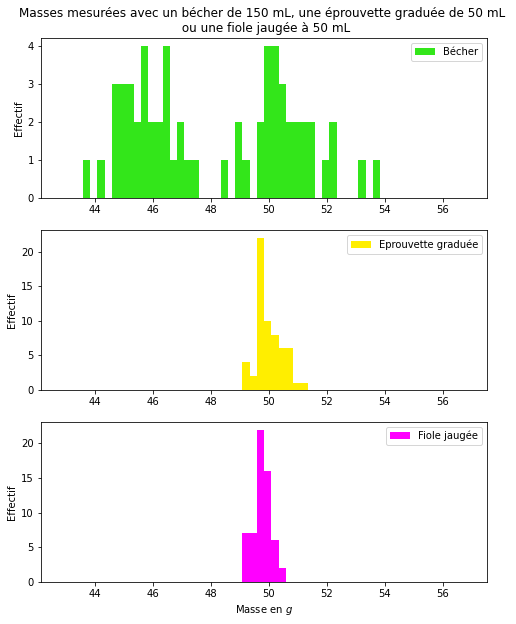

In [6]:
m_ref = 49.839

plt.figure("Masse du volume d'eau prélevé") # Définit le nom de la figure

plt.figure(figsize=(8,10))
plt.subplot(3,1,1) # Partage la figure en 3x1 emplacements de graphes (3 lignes et 1 colonne) et sélectionne le 1er emplacement
plt.hist([m_becher],range=(m_ref-7,m_ref+7),bins=4*int((m_ref+7)-(m_ref-7)),color=[(0.2, 0.9,0.1)])
plt.title("Masses mesurées avec un bécher de 150 mL, une éprouvette graduée de 50 mL \n ou une fiole jaugée à 50 mL")
plt.ylabel('Effectif')
plt.legend(["Bécher"])

plt.subplot(3,1,2)
plt.hist([m_eprouvette],range=(m_ref-7,m_ref+7),bins=4*int((m_ref+7)-(m_ref-7)),color=['#ffee00'])
plt.ylabel('Effectif')
plt.legend(["Eprouvette graduée"])

plt.subplot(3,1,3)
plt.hist([m_fiole],range=(m_ref-7,m_ref+7),bins=4*int((m_ref+7)-(m_ref-7)),color=['magenta'])
plt.xlabel("Masse en $g$")
plt.ylabel('Effectif')
plt.legend(["Fiole jaugée"])

plt.show()